# Agregación de datos y operaciones de grupo

Categorizar un conjunto de datos y aplicar una función a cada grupo, ya sea una agregación o transformación, es a menudo un componente crítico de un flujo de trabajo de análisis de datos. Pandas proporciona un
interfaz de grupo flexible, que le permite dividir, fragmentar y resumir conjuntos de datos en una manera natural


*   Dividir un objeto pandas en pedazos usando una o más llaves (en forma de funciones, arrays o nombres de columna de DataFrame)
*   Calcular estadísticas de resumen de grupo, como recuento, media o desviación estándar, o una función definida por el usuario

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
# DIR = "./data/"
DIR = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/"

## GroupBy y sus mecánicas

Las tareas de agregacion con groupBy las podemos dividir en 3 pasos  


*   Dividir: Partir los datos en grupos basados en una o mas llaves.
*   Aplicar: A cada grupo aplicar una funcion que resulte en un nuevo valor.
*   Combinar: Juntar los resultados de las operaciones anteriores en un nuevo objeto resultado.



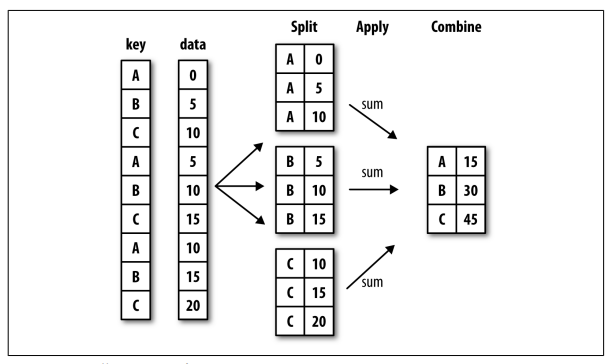

In [ ]:
df = pd.DataFrame({'llave_1' : ['a', 'a', 'b', 'b', 'a'],
                   'llave_2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
# El resultado de un groupby es un objeto GroupBy y no un DataFrame / Serie


In [ ]:
# Si aplicamos alguna funcion de agregacion a un objeto groupBy se aplicara a 
# cada grupo definido por las llaves pasadas a la funcion groupBy


In [ ]:
# Se puede pasar multiples llaves


In [ ]:
# Unstack nos permite convertir la serie con dos niveles de indices en un 
# dataframe
means.unstack()

In [ ]:
# En este ejemplo agregamos columnas y agrupamos por ellas
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df_1 = df.copy()
df_1['estado'] = states
df_1['periodo'] = years
df_1[['estado', 'periodo', 'data1']]

In [ ]:
df_1['data1'].groupby([df_1['estado'], df_1['periodo']]).mean()

In [ ]:
# Alternativamente, podemos pasar los arrays de llaves deseadas y groupby
# las usara si son del tamano correcto
df['data1'].groupby([states, years]).mean()

In [ ]:
# Si la informacion de las llaves esta contenida en el df, se puede usar el 
# nombre de la columna para agrupar


In [ ]:
# Tambien se puede hacer con multiples columnas


### Iterando sobre grupos

El objeto groupby acepta la iteracion, genera una secuencia de duplas conteniendo el nombre del grupo y el pedazo de datos que le corresponde

In [ ]:
for name, group in df.groupby('llave_1'):
    print("#"*80)
    print("Nombre del grupo: " + name)
    print(group)

In [ ]:
# En el caso multillave, el primer elemento sera una tupla con los nombres de
# las llaves
for (k1, k2), group in df.groupby(['llave_1', 'llave_2']):
    print("#"*80)
    print("Nombre de los grupos: " + str((k1, k2)))
    print(group)

In [ ]:
# Podemos usar esto para hacer un diccionario con los grupos de datos!
pieces = dict(list(df.groupby('llave_1')))
pieces['b']

In [ ]:
# Podemos agrupar a traves de las columnas tambien
print(df.dtypes)
grouped = df.groupby(df.dtypes, axis=1)

In [ ]:
for dtype, group in grouped:
    print("#"*80)
    print("Tipo de dato: " + str(dtype))
    print(group)

### Seleccionando un subconjunto de columnas

Es posible seleccionar la columna a ser agregada por medio de indexacion despues de hacer el groupby.  
Esto es especialmente util a la hora de tratar con dataframes grandes  

### Agrupando con diccionarios y series

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

Si tenemos un diccionario que mapee cierta correspondencia entre algun grupo y los indices de algun eje, es posible agrupar por dicho diccionario.

In [ ]:
mapping = {'a': 'rojo', 'b': 'rojo', 'c': 'azul',
           'd': 'azul', 'e': 'rojo', 'f' : 'naranja'}

In [ ]:
# Nota que f no esta en las columnas y eso no causa un error
by_column = people.groupby(mapping, axis=1)
by_column.sum()

In [ ]:
# Hemos mencionado antes la similitud entre las series y los diccionarios. En 
# este ejemplo podemos hacer un mapeo con una serie y esto funciona de manera perfecta
map_series = pd.Series(mapping)
print(map_series)
people.groupby(map_series, axis=1).count()

### Agrupando con funciones

Una generalizacion de lo anterior es la agrupacion por funciones.  
En el ejemplo siguiente agruparemos los nombres usados en el indice por el numero de letras que contienen usando la funcion `len`.

In [ ]:
[(p, len(p)) for p in people.index]

In [ ]:
people.groupby(len).sum()

Se puede combinar el agrupado por funciion con otro tipo de agrupados

In [ ]:
key_list = ['uno', 'uno', 'uno', 'dos', 'dos']
people.groupby([len, key_list]).min()

### Agrupando por niveles de un multiindice

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

Si tenemos un DataFrame multiindice, podemos agrupar por alguno de los niveles

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

## Data Aggregation

Las siguientes funciones cuentan con optimizaciones para usarse con el agrupamiento de DataFrames

| Funcion       | Descripcion      |
|-------------|---------------------------------------------|
| count       | Numero de valores no nulos en el grupo      |
| sum         | Suma de valores no nulos                    |
| mean        | Media de valores no nulos                   |
| median      | mediana de valores no nulos                 |
| std, var    | Varianza y desviacion estandar insesgados   |
| min, max    | Maximo y minimo de valores no nulos         |
| prod        | Producto de valores no nulos                |
| first, last | Primer y ultimo valor (por filas) no nulos  |

Pero como tal podemos usar cualquier funcion o metodo que realice una agregacion de un array (o lista, o serie) a un valor unico (escalar)

Tambien podemos hacer nuestras propias funciones, siempre y cuando cumplan que tomen como argumento un array y regresen un escalar.

Como tal, toda funcion de agregacion que sirva a una serie/dataframe, podra ser usada dentro de un proceso `.groupby().agg()`

| Metodo | Descripción |
| ----------- | ----------- |
|`.count()`| Número de valores que no son NA|
|`.describe()`| Calcular conjunto de estadísticas de resumen para Series o cada columna de DataFrame|
|`.min()`, `.max()` | Calcular valores mínimos y máximos
|`.argmin()`, `.argmax()` | Calcular ubicaciones de índice (enteros) en las que se obtuvo el valor mínimo o máximo, respectivamente
|`.idxmin()`, `.idxmax()` | Calcule las etiquetas de índice en las que se obtuvo el valor mínimo o máximo, respectivamente
|`.quantile()` | Calcule el cuantil de muestra que va de 0 a 1
|`.sum()` | Suma de valores
|`.mean()` | Media de los valores
|`.median()`| Mediana aritmética (50% cuantil) de valores
|`.mad()` | Desviación absoluta media del valor medio
|`.prod()`| Producto de todos los valores
|`.var()`| Varianza muestral de los valores
|`.std()`| Desviación estándar de la muestra de los valores
|`.skew()` | asimetría de la muestra (tercer momento) de los valores
|`.kurt()` | Ejemplo de curtosis (cuarto momento) de valores
|`.cumsum()`| Suma acumulada de valores
|`.cummin()` , `.cummax()`| Mínimo o máximo acumulativo de valores, respectivamente
|`.cumprod()`| Producto acumulado de valores
|`.diff()`| Calcular la primera diferencia aritmética (útil para series de tiempo)
|`.pct_change()`| Calcular cambios porcentuales

Esto incluye el caso especial de `.describe()` que no regresa un escalar, pero puede ser usado con ob

### Agregacion columna a columna y a multiples columnas

Considieremos este dataset con informacion de propinas 

In [ ]:
tips = pd.read_csv(DIR + 'tips.csv')
# Calcula el porcentaje de propina
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

Si queremos obtener mas de una agregacion, es posible pasar el nombre de los metodos o las funciones correspondientes detro de una lista

Si queremos modificar el nombre de las columnas, es posible hacerlo pasando los metodos en duplas `[("nombre metodo 1", <metodo1>), ("nombre metodo 2", <metodo2>)]`

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

El aplicar multiples funciones de agregacion a multiples columnas nos regresa un DataFrame con columnas jerarquicas 

Si queremos pasar distintos metodos a distintas columnas, esto lo podemos hacer por medio de diccionarios

Tambien es posible hacer que el DataFrame resultado no ponga las columnas de agrupación como indice

In [ ]:
tips.groupby(['day', 'smoker'], as_index=False).mean()